# Overview:
Here, we will be using the covid classification

In [154]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import operator
from functools import reduce

In [103]:
covid_df = pd.read_csv('./data/latimes-place-totals.csv')
covid_df['place'].nunique()
covid_df.head()

,date,county,fips,place,confirmed_cases,note,x,y
0,2020-10-25,Alameda,1.0,Alameda,456,NaN,-122.274444,37.756111
1,2020-10-25,Alameda,1.0,Albany,63,NaN,-122.297778,37.886944
2,2020-10-25,Alameda,1.0,Berkeley,749,NaN,-122.272778,37.871667
3,2020-10-25,Alameda,1.0,Dublin,320,NaN,-121.935833,37.702222
4,2020-10-25,Alameda,1.0,Emeryville,102,NaN,-122.285278,37.831389


In [110]:
covid_df['date'] = pd.to_datetime(covid_df['date'])

In [112]:
months = [8, 9, 10]
covid_df['date'].dt.month.isin(months)

0          True
1          True
2          True
3          True
4          True
          ...  
167265    False
167266    False
167267    False
167268    False
167269    False
Name: date, Length: 167270, dtype: bool

In [105]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167270 entries, 0 to 167269
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   date             167270 non-null  datetime64[ns]
 1   county           167270 non-null  object        
 2   fips             165673 non-null  float64       
 3   place            167270 non-null  object        
 4   confirmed_cases  167270 non-null  int64         
 5   note             5176 non-null    object        
 6   x                164796 non-null  float64       
 7   y                164796 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(3)
memory usage: 10.2+ MB


# Create usable covid case dataframe
### Make sure that each place is represented only once.

### Need to automate this

In [114]:
def get_latest_data(months, days, df):
    start_month = months[0]
    end_month = months[-1]
    
    df['date'] = pd.to_datetime(df['date'])
    # start with full dataframe
    df_total = df[df['date'].dt.month.isin(months) & df['date'].dt.day.isin(days)]
    
    #want to go backwards in time
    df = pd.DataFrame()
    places_list = []
    
    #for most recent month
    for x in range(1, len(months)+1):
        current_month = months[-x]
        df_this_month = df_total.loc[df_total['date'].dt.month == current_month]
        
        #for most recent day
        for i in range(1, len(days)+1):
            current_day = days[-i]
            df_this_day = df_this_month.loc[df_this_month['date'].dt.day == current_day]
            
            # only keep rows that have places that aren't represented yet
            df_not_listed_yet = df_this_day[df_this_day['place'].isin(places_list) == False]
            
            df = df.append(df_not_listed_yet)
            places_list = df['place'].to_list()
                
    
    return df

In [126]:
covid_df = pd.read_csv('./data/latimes-place-totals.csv')
real_df = get_latest_data(months = list(range(3, 11)), days = list(range(1, 26)), df = covid_df)

real_df.dropna(subset = ['x', 'y'], inplace = True)
real_df.head()

,date,county,fips,place,confirmed_cases,note,x,y
0,2020-10-25,Alameda,1.0,Alameda,456,NaN,-122.274444,37.756111
1,2020-10-25,Alameda,1.0,Albany,63,NaN,-122.297778,37.886944
2,2020-10-25,Alameda,1.0,Berkeley,749,NaN,-122.272778,37.871667
3,2020-10-25,Alameda,1.0,Dublin,320,NaN,-121.935833,37.702222
4,2020-10-25,Alameda,1.0,Emeryville,102,NaN,-122.285278,37.831389


In [135]:
real_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1205 entries, 0 to 167255
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             1205 non-null   datetime64[ns]
 1   county           1205 non-null   object        
 2   fips             1192 non-null   float64       
 3   place            1205 non-null   object        
 4   confirmed_cases  1205 non-null   int64         
 5   note             40 non-null     object        
 6   x                1205 non-null   float64       
 7   y                1205 non-null   float64       
 8   log_cases        1205 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(3)
memory usage: 94.1+ KB


In [128]:
# find outliers and eliminate
real_df = real_df.loc[real_df['x'] != real_df['x'].max()]

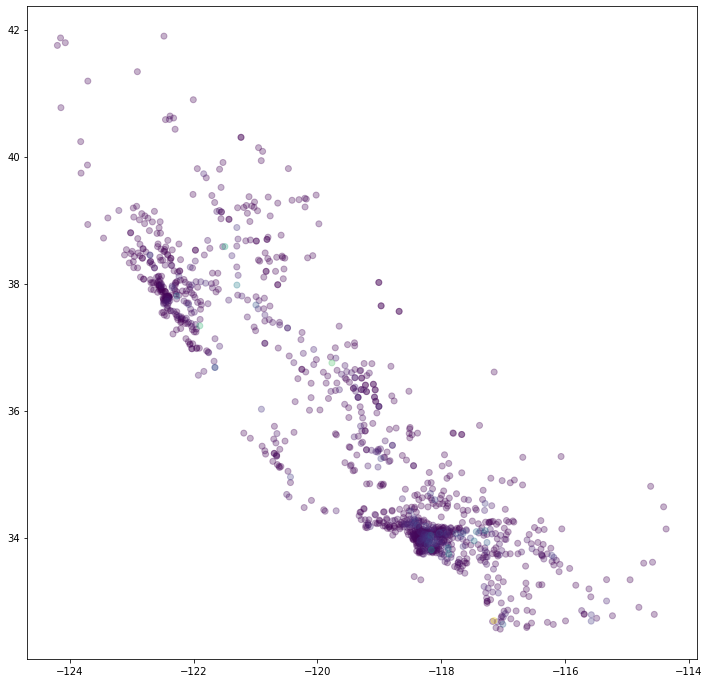

In [279]:
plt.figure(figsize=(12, 12))
plt.scatter(real_df['x'], real_df['y'], c = real_df['confirmed_cases'], alpha = .3)

(array([1.116e+03, 6.600e+01, 1.100e+01, 3.000e+00, 4.000e+00, 1.000e+00,
        2.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([1.00000e+00, 2.36530e+03, 4.72960e+03, 7.09390e+03, 9.45820e+03,
        1.18225e+04, 1.41868e+04, 1.65511e+04, 1.89154e+04, 2.12797e+04,
        2.36440e+04]),
 <a list of 10 Patch objects>)

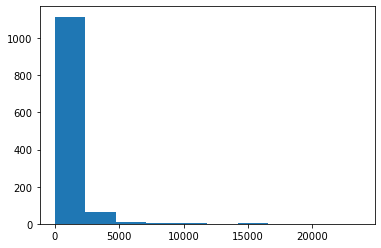

In [132]:
plt.hist(real_df['confirmed_cases'])

In [133]:
real_df['log_cases'] = np.log(real_df['confirmed_cases'])

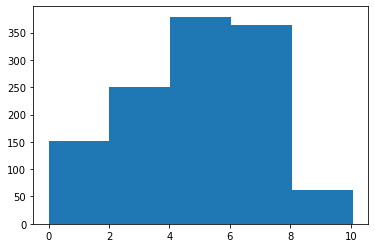

In [212]:
# get number in each bin
(n, bins, patches) = plt.hist(real_df['log_cases'], bins=5, label='hst')

plt.show()

In [213]:
print(n)

[151. 250. 379. 363.  62.]


In [214]:
real_df.sort_values(by = 'log_cases', inplace = True)

In [215]:
# instantiate empty list
bin_num = []
for x in range(len(n)):
    lis = [x]
    bin_num.append(lis * int(n[x]))

bins = reduce(operator.concat, bin_num)
len(bins)

1205

In [216]:
real_df['category'] =  bins

In [217]:
real_df.tail()

,date,county,fips,place,confirmed_cases,note,x,y,log_cases,category
253,2020-10-25,Los Angeles,37.0,Long Beach,13013,NaN,-118.161014,33.805559,9.473704,4
2013,2020-10-23,Sacramento,67.0,Sacramento,14476,NaN,-121.494444,38.581667,9.580247,4
637,2020-10-25,Santa Clara,85.0,San Jose,15817,NaN,-121.900000,37.333333,9.668841,4
1353,2020-10-23,Fresno,19.0,Fresno,17052,NaN,-119.766667,36.750000,9.744023,4
590,2020-10-25,San Diego,73.0,San Diego,23644,NaN,-117.148962,32.692470,10.070865,4


In [232]:
from pandas.api.types import CategoricalDtype

In [255]:
bin_values = list(range(10))
cat_type = CategoricalDtype(categories=bin_values, ordered = True)

real_df['ordinal_cat'] = real_df['category'].astype(cat_type)
#real_df['ordinal_cat'] = pd.Categorical(real_df['category'], ordered =True, categories = bins)

In [273]:
real_df.tail()

,date,county,fips,place,confirmed_cases,note,x,y,log_cases,category,ordinal_cat
253,2020-10-25,Los Angeles,37.0,Long Beach,13013,NaN,-118.161014,33.805559,9.473704,4,4
2013,2020-10-23,Sacramento,67.0,Sacramento,14476,NaN,-121.494444,38.581667,9.580247,4,4
637,2020-10-25,Santa Clara,85.0,San Jose,15817,NaN,-121.900000,37.333333,9.668841,4,4
1353,2020-10-23,Fresno,19.0,Fresno,17052,NaN,-119.766667,36.750000,9.744023,4,4
590,2020-10-25,San Diego,73.0,San Diego,23644,NaN,-117.148962,32.692470,10.070865,4,4


In [271]:
real_df.to_csv('./data/clean_covid_data.csv', index = False)

# NOTE: For the updated version of the rest of this, look at Shiffraw's branch
## Draft Models
- for train/test/split, will need to stratify!!! if possible.

In [160]:
#Imports
%matplotlib inline
import numpy as mp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier

#### Create X and y

In [257]:
X = real_df[['x', 'y']]
y = real_df['ordinal_cat']

In [258]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 22)#, stratify = y)

In [259]:
sscaler = StandardScaler()
X_train_scaled = sscaler.fit_transform(X_train)
X_test_scaled = sscaler.transform(X_test)

In [260]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train_scaled, y_train)
knn.score(X_test_scaled, y_test)

0.38741721854304634

In [261]:
knn.predict_proba(X_test)

array([[0.        , 0.33333333, 0.66666667, 0.        , 0.        ],
       [0.        , 0.33333333, 0.66666667, 0.        , 0.        ],
       [0.        , 0.33333333, 0.66666667, 0.        , 0.        ],
       ...,
       [0.        , 0.33333333, 0.66666667, 0.        , 0.        ],
       [0.        , 0.33333333, 0.66666667, 0.        , 0.        ],
       [0.        , 0.33333333, 0.66666667, 0.        , 0.        ]])

### Well that was gross.
# Let's try Random Forests

In [175]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

In [262]:
forest = RandomForestClassifier() 

In [263]:
cross_val_score(forest, X_train, y_train, cv = 5).mean()

0.3576795580110497

In [222]:
params = {
    'n_estimators': [100, 200, 500, 1000], #how many decision trees are under the hood
    'max_depth': [2, 5, 7],
    'min_samples_split': [1, 2, 3],
    'min_samples_leaf': [1, 2]
}
forest = RandomForestClassifier()
grid = GridSearchCV(forest, param_grid = params, cv = 5, n_jobs = -1)

In [223]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 7], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [1, 2, 3],
                         'n_estimators': [100, 200, 500, 1000]})

In [224]:
grid.score(X_test, y_test)

0.39403973509933776

In [225]:
grid.best_params_

{'max_depth': 5,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 500}

In [234]:
gas_df = pd.read_csv('./data/gas_stations.csv')

In [235]:
gas_df.head()

,name,longitude,latitude
0,Circle K & Minimart,-117.190777,34.057365
1,NaN,-117.225609,34.048575
2,NaN,-117.156299,34.041388
3,Arco,-122.420268,37.768468
4,Valley Oil,-122.070127,37.381165


In [241]:
X_gas = gas_df[['longitude', 'latitude']]

In [242]:
# use random forest to predict category (y) for each data point
y_gas = grid.predict(X_gas)

In [243]:
gas_df['cat'] = y_gas

In [244]:
gas_df.head()

,name,longitude,latitude,cat
0,Circle K & Minimart,-117.190777,34.057365,3
1,NaN,-117.225609,34.048575,3
2,NaN,-117.156299,34.041388,3
3,Arco,-122.420268,37.768468,2
4,Valley Oil,-122.070127,37.381165,2


In [ ]:
gas_df = gas
real_df = real_df.loc[real_df['x'] != real_df['x'].max()]

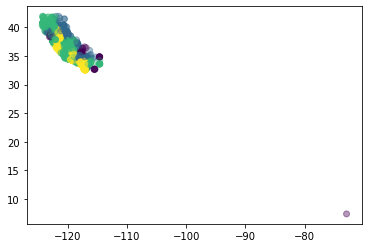

In [245]:
plt.scatter(gas_df['longitude'], gas_df['latitude'], c = gas_df['cat'], alpha = .4)

In [247]:
covid_df.head()

,date,county,fips,place,confirmed_cases,note,x,y
0,2020-10-25,Alameda,1.0,Alameda,456,NaN,-122.274444,37.756111
1,2020-10-25,Alameda,1.0,Albany,63,NaN,-122.297778,37.886944
2,2020-10-25,Alameda,1.0,Berkeley,749,NaN,-122.272778,37.871667
3,2020-10-25,Alameda,1.0,Dublin,320,NaN,-121.935833,37.702222
4,2020-10-25,Alameda,1.0,Emeryville,102,NaN,-122.285278,37.831389


# Let's try regression

### KNN

In [264]:
from sklearn.neighbors import KNeighborsRegressor

In [265]:
real_df.head()

,date,county,fips,place,confirmed_cases,note,x,y,log_cases,category,ordinal_cat
2254,2020-10-23,Sonoma,97.0,Bodega,1,10 or fewer,-122.973889,38.345278,0.0,0,0
97520,2020-07-02,Plumas,63.0,Indian Valley,1,NaN,-120.885787,40.081003,0.0,0,0
103854,2020-06-24,Nevada,57.0,95927,1,9 or fewer,-121.940086,39.809273,0.0,0,0
161198,2020-04-07,Riverside,65.0,Indio Hills,1,NaN,-116.231396,33.831128,0.0,0,0
1809,2020-10-23,Marin,41.0,Inverness,1,9 or fewer,-122.857675,38.101176,0.0,0,0


In [266]:
X = real_df[['x', 'y']]
y = real_df['log_cases']

In [267]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 22)#, stratify = y)

In [268]:
sscaler = StandardScaler()
X_train_scaled = sscaler.fit_transform(X_train)
X_test_scaled = sscaler.transform(X_test)

In [269]:
knn = KNeighborsRegressor()
knn.fit(X_train_scaled, y_train)
knn.score(X_test_scaled, y_test)

0.28977573584602145

### Logistic

In [274]:
from sklearn.linear_model import LinearRegression, LogisticRegression

In [275]:
clf = LogisticRegression()

In [276]:
clf.fit(X_train, y_train)

ValueError: Unknown label type: 'continuous'